## pCMV-Target-AID 
QUEEN script for pCMV-Target-AID construction.
1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129.
2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046.
3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048.
4. The three fragments were assembled by Gibson Assembly.

In [1]:
%matplotlib inline

In [2]:
import sys 
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

In [3]:
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")           #Load pCMV-ABE plasmid object.
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID") #Load pCDNA3.1-Target-AID plasmid object. 

<queen.QUEEN object; project='pcDNA31_Target_AID', length='10419 bp', topology='circular'>

In [4]:
processname1 = "PCR"
description1 = "1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129."
QUEEN("GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG", product="RS045")   #Create a QUEEN object for the forward primer. 
QUEEN("CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA", product="HM129") #Create a QUEEN object for the reverse primer.
pcDNA31_Target_AID.searchsequence(RS045.seq[-18:], product="FW1", pn=processname1, pd=description1)          #Search for the 18-bp 3’-end sequences of the forward primer.
pcDNA31_Target_AID.searchsequence(HM129.seq[-18:], product="RV1", pn=processname1, pd=description1)          #Search for the 18-bp 3’-end sequences of the reverse primer.
cropdna(pcDNA31_Target_AID, FW1[0].end, RV1[0].start, product="extract1", pn=processname1, pd=description1)  #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract1, RS045.seq, HM129.rcseq, setfeature={"feature_id":"fragnment-1", "qualifier:label":"fragment-1"}, 
           product="fragment1", pn=processname1, pd=description1)                                            #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment1', length='2596 bp', topology='linear'>

In [5]:
processname2 = "PCR"
description2 = "2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046."
QUEEN(seq="CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC", product="HM128")  #Create a QUEEN object for the forward primer. 
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046") #Create a QUEEN object for the reverse primer.
pcDNA31_Target_AID.searchsequence(HM128.seq[-18:], product="FW2", pn=processname2, pd=description2)              #Search for the 18-bp 3’-end sequences of the forward primer.
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV2", pn=processname2, pd=description2)              #Search for the 18-bp 3’-end sequences of the reverse primer.
f2 = cropdna(pcDNA31_Target_AID, FW2[0].end, RV2[0].start, product="extract2", pn=processname2, pd=description2) #Crop the internal DNA sequence flanked by the primer annealing sites. 
modifyends(extract2, HM128.seq, RS046.rcseq, setfeature={"feature_id":"fragment-2", "qualifier:label":"fragment-2"}, 
           product="fragment2", pn=processname2, pd=description2)                                                #Add forward and reverse primer sequences to the both ends of the cropped fragment.

<queen.QUEEN object; project='fragment2', length='2831 bp', topology='linear'>

In [6]:
processname3 = "PCR"
description3 = "3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048."
QUEEN("ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC", product="RS047") #Create a QUEEN object for the forward primer. 
QUEEN("CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG", product="RS048")    #Create a QUEEN object for the reverse primer. 
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW3", pn=processname3, pd=description3)                    #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_ABE.searchsequence(RS048.seq[-18:], product="RV3", pn=processname3, pd=description3)                    #Search for the 18-bp 3’-end sequences of the reverse primer.
f3 = cropdna(pCMV_ABE, FW3[0].end, RV3[0].start, product="extract3", pn=processname3, pd=description3)       #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract3, RS047.seq, RS048.rcseq, setfeature={"feature_id":"fragment-3", "qualifier:label":"fragment-3"},
           product="fragment3", pn=processname3, pd=description3)                                            #Add forward and reverse primer sequences to the both ends of the cropped fragment.

<queen.QUEEN object; project='fragment3', length='3403 bp', topology='linear'>

In [7]:
processname4 = "Gibson Assembly" 
description4 = "4. The three fragments were assembled by Gibson Assembly."
modifyends(fragment1, "*{30}/-{30}","-{30}/*{30}", product="fragment1_mod", pn=processname4, pd=description4)                          #Generate long sticky ends on the both sides of "fragment1".
modifyends(fragment2, "*{30}/-{30}","-{30}/*{30}", product="fragment2_mod", pn=processname4, pd=description4)                          #Generate long sticky ends on the both sides of "fragment2".
modifyends(fragment3, "*{30}/-{30}","-{30}/*{30}", product="fragment3_mod", pn=processname4, pd=description4)                          #Generate long sticky ends on the both sides of "fragment3".
joindna(fragment1_mod, fragment2_mod, fragment3_mod, topology="circular", product="pCMV_Target_AID", pn=processname4, pd=description4) #Join the fragments.

<queen.QUEEN object; project='pCMV_Target_AID', length='8752 bp', topology='circular'>

In [8]:
pCMV_Target_AID.printfeature()

feature_id   feature_type  qualifier:label     start  end   strand  
0            source        source              0      3308  +       
100          primer_bind   M13 Reverse         275    292   -       
200          primer_bind   M13/pUC Reverse     288    311   -       
300          protein_bind  lac operator        299    316   +       
400          promoter      lac promoter        323    354   -       
500          protein_bind  CAP binding site    368    390   +       
600          primer_bind   L4440               506    524   -       
700          rep_origin    ori                 677    1266  -       
800          primer_bind   pBR322ori-F         757    777   -       
900          CDS           AmpR                1436   2297  -       
1000         primer_bind   Amp-R               2059   2079  +       
1100         promoter      AmpR promoter       2297   2402  -       
1200         primer_bind   pRS-marker          2480   2500  -       
1300         enhancer      CMV enh

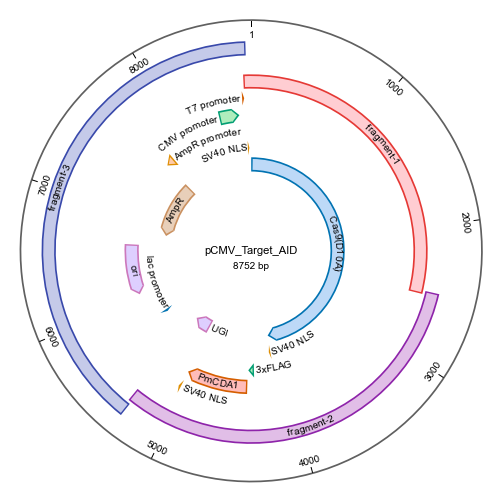

In [9]:
def add_fragment_annotation(dna, feature_id, color_set):
    editfeature(dna, key_attribute="qualifier:label", query=feature_id, target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False)
    editfeature(dna, key_attribute="qualifier:label", query=feature_id, target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False)
    editfeature(dna, key_attribute="qualifier:label", query=feature_id, target_attribute="strand", operation=replaceattribute(0), new_copy=False)
    return dna 

def visualization(dna):
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")           #Search for the feature that represent the Cas9 gene.
    plasmid   = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular")                     #Set the first nucleotide of the Cas9 gene as the start position of the plasmid.
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+") #Obtain the features whose feature_id are "fragment-[0-9]+".
    fragments.sort(key=lambda x:int(x.qualifiers["label"][0].split("-")[1]))                    #Sort the order of fragments according to qualifier.label.
    features  = (plasmid.searchfeature(key_attribute="feature_type", query="CDS") 
                 + plasmid.searchfeature(key_attribute="feature_type", query="promoter") 
                 + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments)            #Select the sequence features to be visualized
    fig = visualizemap(plasmid, feature_list=features, map_view="circular", tick_interval=1000, title=dna.project) #Visualize the circular seqeunce map of the plasmid.
    return fig, plasmid

#Paris of color codes for gene edge and face 
color_sets = [('#E53935', '#ffcdd2'), ('#8E24AA', '#e1bee7'), ('#3949AB', '#c5cae9'), ('#1E88E5', '#bbdefb'), ('#00ACC1', '#b2ebf2'), ('#D81B60', '#f8bbd0'), ('#5E35B1', '#d1c4e9'), 
              ('#43A047', '#c8e6c9'), ('#7CB342', '#dcedc8'), ('#FDD835', '#fff9c4'), ('#FB8C00', '#ffe0b2'), ('#6D4C41', '#d7ccc8'), ('#C0CA33', '#f0f4c3'), ('#546E7A', '#cfd8dc')]

pCMV_Target_AID = add_fragment_annotation(pCMV_Target_AID, "fragment-1", color_sets[0]) #Add "fragment1" to .dnafeatures of "pCMV_Target_AID" plasmid object. 
pCMV_Target_AID = add_fragment_annotation(pCMV_Target_AID, "fragment-2", color_sets[1]) #Add "fragment2" to .dnafeatures of "pCMV_Target_AID" plasmid object. 
pCMV_Target_AID = add_fragment_annotation(pCMV_Target_AID, "fragment-3", color_sets[2]) #Add "fragment3" to .dnafeatures of "pCMV_Target_AID" plasmid object. 
fig, plasmid = visualization(pCMV_Target_AID)                                           #Visualize the circular sequence map of pCMV-Target-AID.

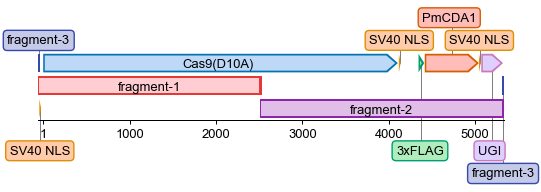

In [10]:
#Visualize the map of pCMV-Target-AID.
fig = visualizemap(plasmid, start=8688, end=5335, width_scale=0.40, tick_interval=1000, title="", fontsize=13, height_scale=1.05)
fig.savefig("output/fig2c.pdf", bbox_inches="tight")

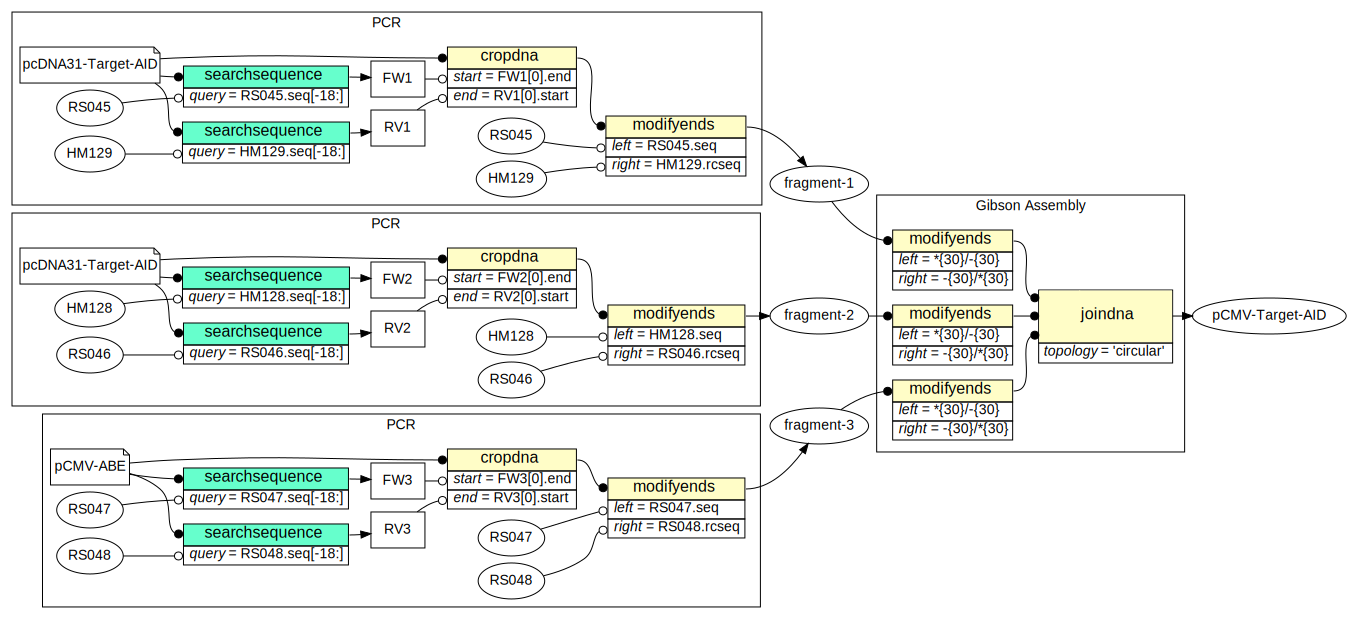

In [11]:
#Visualize the operational process chart of pCMV-Target-AID.
flow = visualizeflow(pCMV_Target_AID, alias_dict={"fragment1":"fragment-1", "fragment2":"fragment-2", "fragment3":"fragment-3", "pcDNA31_Target_AID": "pcDNA31-Target-AID", "pCMV_ABE": "pCMV-ABE", "pCMV_Target_AID": "pCMV-Target-AID"})
flow.render("output/pCMV_Target_AID_construction")
flow

In [12]:
pCMV_Target_AID.outputgbk("output/pCMV-Target-AID.gbk")

In [13]:
quine(pCMV_Target_AID, execution=True)

True

In [14]:
quine(pCMV_Target_AID, process_description=True)

1. The N-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS045/HM129.
2. The C-terminus half of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair HM128/RS046.
3. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS048.
4. The three fragments were assembled by Gibson Assembly.
